In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
all = pd.read_html(url, thousands="", decimal=",", match = "Коефіцієнт народжуваності в регіонах України",)

data = pd.DataFrame(all[0])
print(data.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [53]:
count = data.shape
print("Кількість рядків та стовпців:", count)

Кількість рядків та стовпців: (28, 9)


In [62]:
data2 = data.copy()
data2.replace('—', pd.NA, inplace=True)
print(data2)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  <NA>  <NA>
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2  <NA>
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1  <NA>
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [63]:
column = data2.dtypes
print(column)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [66]:
data2 = data2.replace("—", np.nan)

numeric_columns = data2.select_dtypes(include=['object'])

for column in numeric_columns.columns:
    if column != 'Регіон':
        data2[column] = pd.to_numeric(data2[column], errors='coerce')

print(data2.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [67]:
missed = data2.isnull().sum(axis=0) / len(data2)
print(missed)

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [68]:
data2 = data2.drop(data2.index[len(data2)-1])
print(data2)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [69]:
means = data2.mean(axis=0, numeric_only=True)
print(means)
data2 = data2.fillna(means)
print(data2)

1950    23.104000
1960    20.757692
1970    15.600000
1990    13.059259
2000     8.222222
2012    11.655556
2014    11.144000
2019     8.017391
dtype: float64
               Регіон    1950       1960  1970  1990  2000  2012    2014  \
0                Крим  23.000  20.600000  16.0  13.0   7.3  12.6  11.144   
1           Вінницька  22.400  19.200000  14.2  12.4   8.4  11.2  10.900   
2           Волинська  24.700  25.000000  17.9  15.3  11.2  14.8  14.100   
3    Дніпропетровська  20.400  20.400000  15.1  12.3   7.1  11.2  11.100   
4            Донецька  27.100  21.400000  14.0  10.9   6.1   9.8   8.200   
5         Житомирська  26.100  22.300000  15.9  12.9   8.9  12.2  12.000   
6        Закарпатська  31.400  27.300000  20.7  16.8  11.5  15.1  14.600   
7          Запорізька  21.900  19.700000  15.0  12.4   7.1  10.6  10.600   
8   Івано-Франківська  24.300  24.800000  18.2  15.5  10.3  12.4  12.200   
9            Київська  20.400  18.900000  15.6  12.3   7.3  12.2  12.100   
10   

In [70]:
means2019 = data2.mean(axis=0, numeric_only=True)['2019']
print(means2019)
data2[data2['2019'] > means2019]

8.017391304347827


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
2,Волинська,24.700,25.0,17.9,15.3,11.2,14.8,14.1,10.1
6,Закарпатська,31.400,27.3,20.7,16.8,11.5,15.1,14.6,10.4
8,Івано-Франківська,24.300,24.8,18.2,15.5,10.3,12.4,12.2,8.8
12,Львівська,23.400,24.0,17.1,14.0,9.1,11.9,11.9,8.7
14,Одеська,24.100,19.2,14.8,12.6,8.0,12.7,12.3,8.8
16,Рівненська,26.900,26.7,19.3,15.8,11.8,15.9,14.8,10.7
20,Херсонська,20.800,21.4,16.6,14.3,8.5,11.7,11.5,8.1
23,Чернівецька,24.700,21.8,17.0,14.8,10.1,12.8,12.9,9.2
25,Київ,23.104,17.4,15.9,12.0,7.3,12.0,12.1,11.0


In [71]:
data2[data2['2014'] == data2['2014'].max()]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
16,Рівненська,26.9,26.7,19.3,15.8,11.8,15.9,14.8,10.7


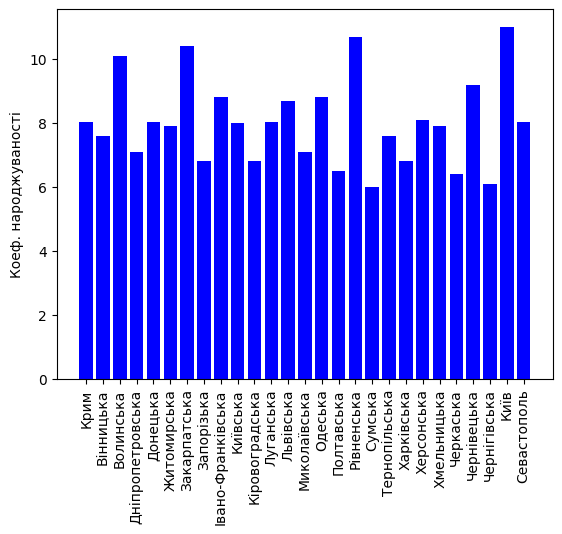

In [77]:
plt.bar(data2['Регіон'],data2['2019'], color='b')
plt.xticks(rotation=90)
plt.ylabel('Коеф. народжуваності')
plt.show()